In [26]:
# 필요한 라이브러리들 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

In [ ]:
# csv를 읽어와서 Pandas DataFrame으로 저장
# concat
b1_df = pd.read_csv('data/2000_2001_hitter.csv')
b2_df = pd.read_csv('data/2002_2013_hitter.csv')
b_df = pd.concat([b1_df, b2_df], axis=0, ignore_index=True)
b_df

,YrPlayer,Year,Rank,Player,Team,AVG,G,PA,AB,H,...,TA,RC,RC/27,wOBA,XR,R,SAC,MH,RISP,PH-BA
0,2000박종호,2000,1,박종호,현대,0.340,121,541,441,150,...,0.976667,100.354529,8.286154,0.400138,92.804,NaN,NaN,NaN,NaN,NaN
1,2000김동주,2000,2,김동주,두산,0.339,127,539,469,159,...,1.063830,115.473840,9.306847,0.431993,105.000,NaN,NaN,NaN,NaN,NaN
2,2000브리또,2000,3,브리또,SK,0.338,103,452,405,137,...,0.931655,86.204956,8.224501,0.400969,77.820,NaN,NaN,NaN,NaN,NaN
3,2000송지만,2000,4,송지만,한화,0.338,120,530,468,158,...,1.110092,119.916981,9.811389,0.436688,107.594,NaN,NaN,NaN,NaN,NaN
4,2000데이비스,2000,5,데이비스,한화,0.334,107,458,419,140,...,0.923588,82.605677,7.125729,0.394586,80.284,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,2013이범호,2013,44,이범호,KIA,0.248,122,516,436,108,...,0.764368,67.593488,5.112113,0.348244,68.728,56.0,4.0,27.0,0.189,0.000
590,2013나성범,2013,45,나성범,NC,0.243,104,458,404,98,...,0.717460,56.552882,4.756784,0.318433,57.720,55.0,0.0,19.0,0.242,0.000
591,2013장기영,2013,46,장기영,넥센,0.242,115,407,360,87,...,0.545139,36.474644,3.282718,0.278460,36.876,54.0,9.0,21.0,0.325,0.250
592,2013강민호,2013,47,강민호,롯데,0.235,105,405,327,77,...,0.769531,51.330370,5.269658,0.332070,53.184,48.0,1.0,17.0,0.259,0.000


In [3]:
b_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 41 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   YrPlayer  594 non-null    object 
 1   Year      594 non-null    int64  
 2   Rank      594 non-null    int64  
 3   Player    594 non-null    object 
 4   Team      594 non-null    object 
 5   AVG       594 non-null    float64
 6   G         594 non-null    int64  
 7   PA        594 non-null    int64  
 8   AB        594 non-null    int64  
 9   H         594 non-null    int64  
 10  1B        594 non-null    int64  
 11  2B        594 non-null    int64  
 12  3B        594 non-null    int64  
 13  HR        594 non-null    int64  
 14  RBI       594 non-null    int64  
 15  SB        594 non-null    int64  
 16  CS        594 non-null    int64  
 17  BB        594 non-null    int64  
 18  HBP       594 non-null    int64  
 19  SO        594 non-null    int64  
 20  GDP       594 non-null    int64 

In [6]:
b_df.isnull().sum()[b_df.isnull().sum() > 0]

E        505
SH       505
R         89
SAC       89
MH        89
RISP      89
PH-BA     89
dtype: int64

In [4]:
b_df.describe()

,Year,Rank,AVG,G,PA,AB,H,1B,2B,3B,...,TA,RC,RC/27,wOBA,XR,R,SAC,MH,RISP,PH-BA
count,594.000000,594.000000,594.00000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,2006.481481,21.853535,0.28686,121.479798,489.208754,422.518519,121.545455,85.252525,21.045455,1.797980,...,0.791354,71.573499,5.960034,0.351992,68.937633,62.037624,6.164356,32.192079,0.290737,0.189950
std,4.066956,12.504721,0.02783,8.423473,54.179766,46.961042,20.182610,16.499891,6.060094,1.864625,...,0.156660,21.735036,1.790575,0.040280,18.744950,16.527531,6.360119,7.880351,0.046791,0.277566
min,2000.000000,1.000000,0.20300,93.000000,390.000000,327.000000,71.000000,36.000000,5.000000,0.000000,...,0.478571,29.373224,2.367394,0.258774,28.178000,26.000000,0.000000,14.000000,0.149000,0.000000
25%,2003.000000,11.000000,0.26700,117.000000,443.250000,384.250000,107.000000,74.000000,16.000000,0.000000,...,0.674069,55.987838,4.696672,0.323589,55.455000,50.000000,1.000000,26.000000,0.259000,0.000000
50%,2006.000000,22.000000,0.28600,123.000000,487.000000,420.500000,120.000000,84.000000,21.000000,1.000000,...,0.779614,67.809254,5.685805,0.350069,66.673000,61.000000,4.000000,32.000000,0.291000,0.000000
75%,2010.000000,32.000000,0.30500,128.000000,533.000000,458.750000,135.000000,95.000000,25.000000,3.000000,...,0.877462,83.464569,6.816366,0.375926,79.912000,73.000000,10.000000,37.000000,0.320000,0.333000
max,2013.000000,48.000000,0.37200,133.000000,617.000000,542.000000,176.000000,134.000000,43.000000,12.000000,...,1.531746,166.135175,14.726092,0.488818,144.746000,123.000000,36.000000,58.000000,0.438000,1.000000


In [8]:
# 변수 선택
X = b_df[['HR','OPS','ISO','SECA','TA','RC','RC/27','wOBA','XR']]
y = b_df['YrPlayer']

print(X.shape, y.shape)
X.head()
y.head()

(594, 9) (594,)


0     2000박종호 
1     2000김동주 
2     2000브리또 
3     2000송지만 
4    2000데이비스 
Name: YrPlayer, dtype: object

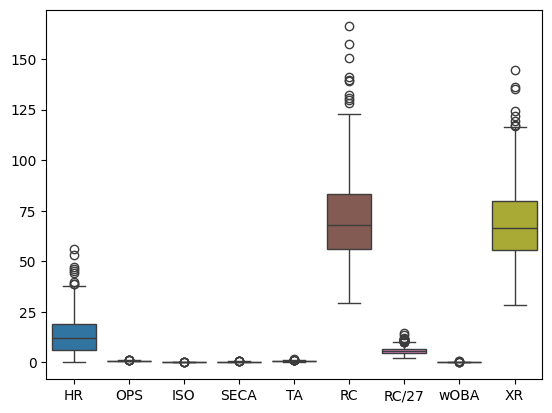

In [16]:
# 데이터 분포 확인(박스플롯)
sns.boxplot(data=X)
plt.show()

In [21]:
# 데이터 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.36406189,  1.05027189, -0.04337159, ...,  1.30018626,
         1.19628229,  1.27428894],
       [ 1.85229147,  1.99005945,  1.74264008, ...,  1.87070332,
         1.98777169,  1.92546588],
       [ 0.16364129,  1.18442569,  0.66338794, ...,  1.26572546,
         1.21691743,  0.47425325],
       ...,
       [-1.20838698, -1.75824612, -1.2488241 , ..., -1.49648738,
        -1.8270757 , -1.71185603],
       [-0.25852126, -0.61333715, -0.18327124, ..., -0.38588608,
        -0.49502083, -0.84112845],
       [ 0.16364129, -1.27568119,  0.57076608, ..., -1.30509814,
        -1.45177721, -1.48152008]], shape=(594, 9))

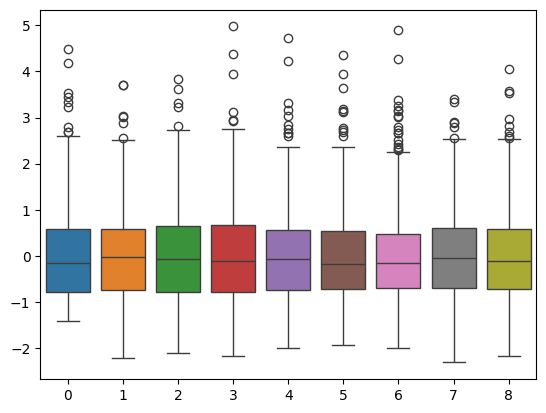

In [22]:
sns.boxplot(data=X_scaled)
plt.show()

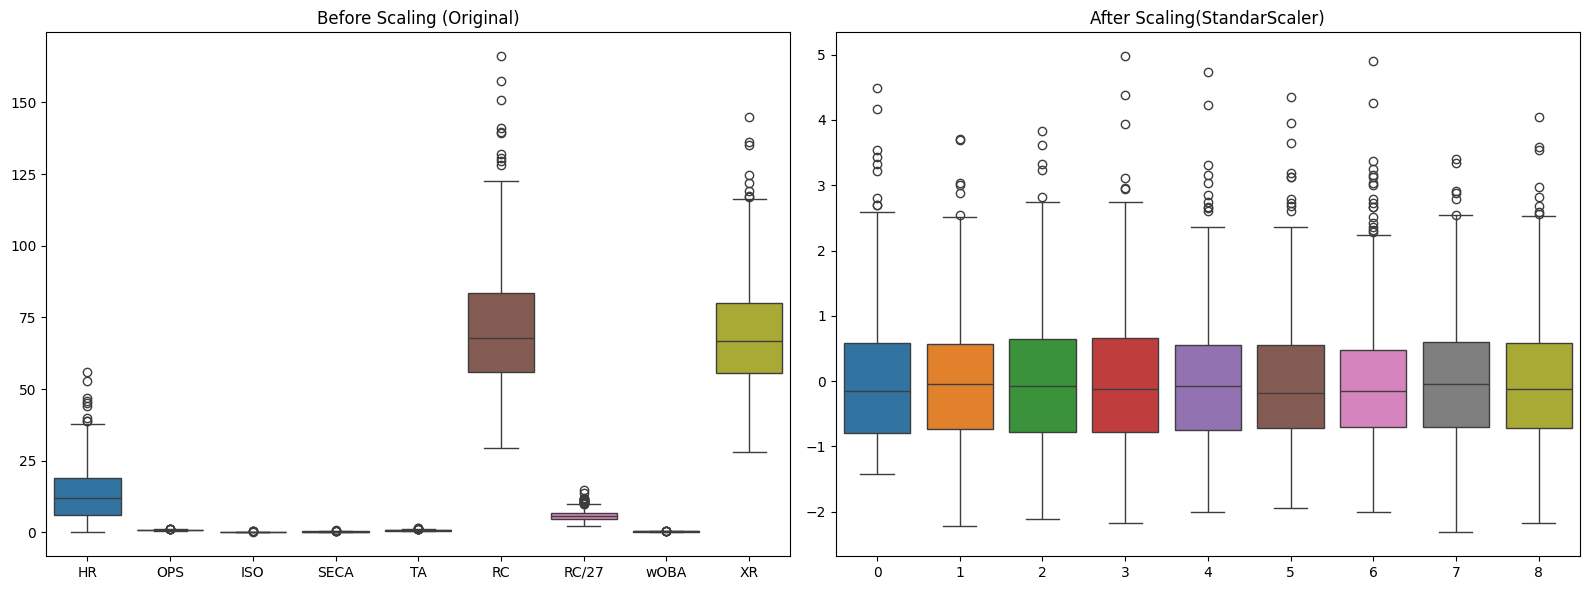

In [30]:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
sns.boxplot(data=X)
plt.title('Before Scaling (Original)')

plt.subplot(1,2,2)
sns.boxplot(data=X_scaled)
plt.title('After Scaling(StandarScaler)')

plt.tight_layout()
plt.show()

#### 최적의 k 찾기


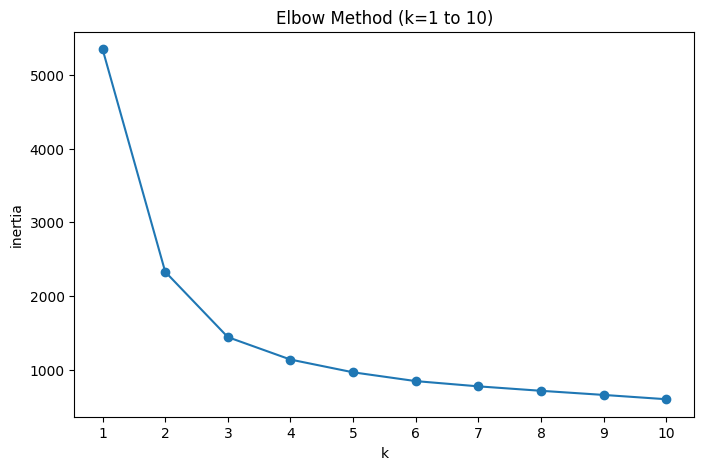

In [24]:
# 엘보우 기법으로 최적의 k 찾기

inertia = []
range_k = range(1, 11)
for n in range_k:
    km = KMeans(n_clusters=n, random_state=42) # random_state 고정
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range_k, inertia, marker='o')
plt.title('Elbow Method (k=1 to 10)')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(range_k)
plt.show()

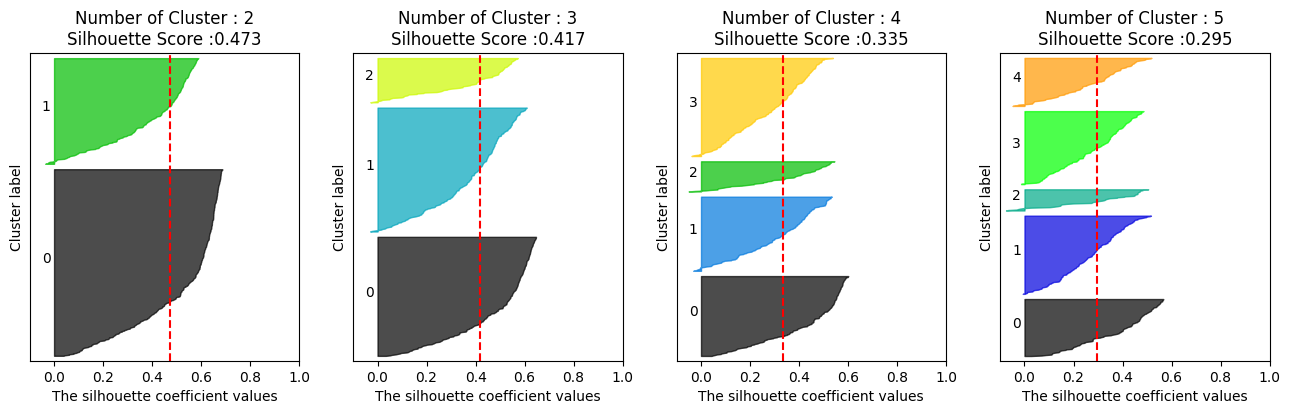

In [29]:
# 실루엣 점수 확인
from sklearn.metrics import silhouette_samples, silhouette_score

# 시각화 함수
def visualize_silhouette(cluster_lists, X_features): 
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

visualize_silhouette([2, 3, 4, 5], X_scaled)

plt.show()

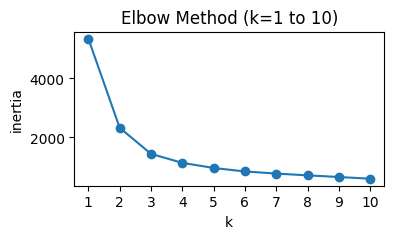

<Figure size 400x300 with 0 Axes>

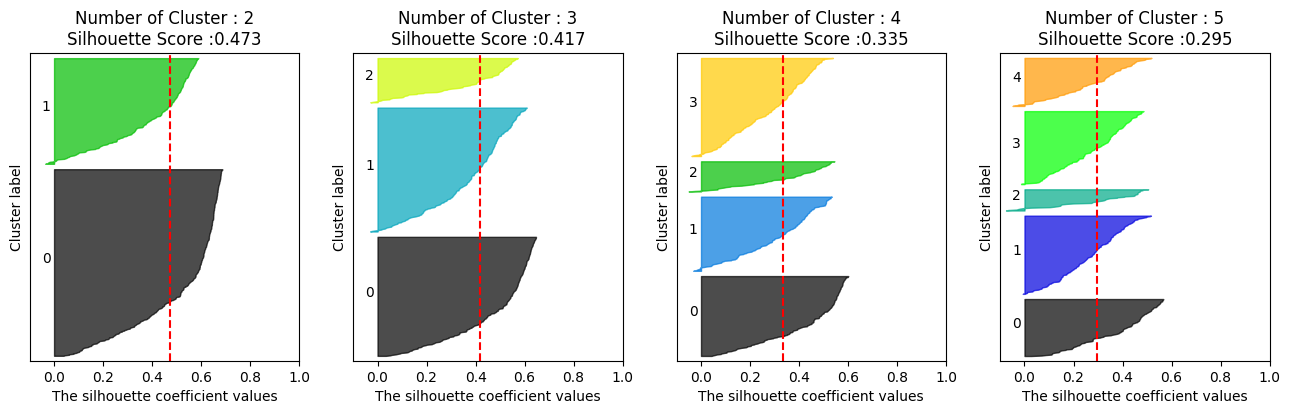

In [36]:
plt.figure(figsize=(4, 2))
plt.plot(range_k, inertia, marker='o')
plt.title('Elbow Method (k=1 to 10)')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(range_k)

plt.figure(figsize=(4, 3))
visualize_silhouette([2, 3, 4, 5], X_scaled)
plt.show()

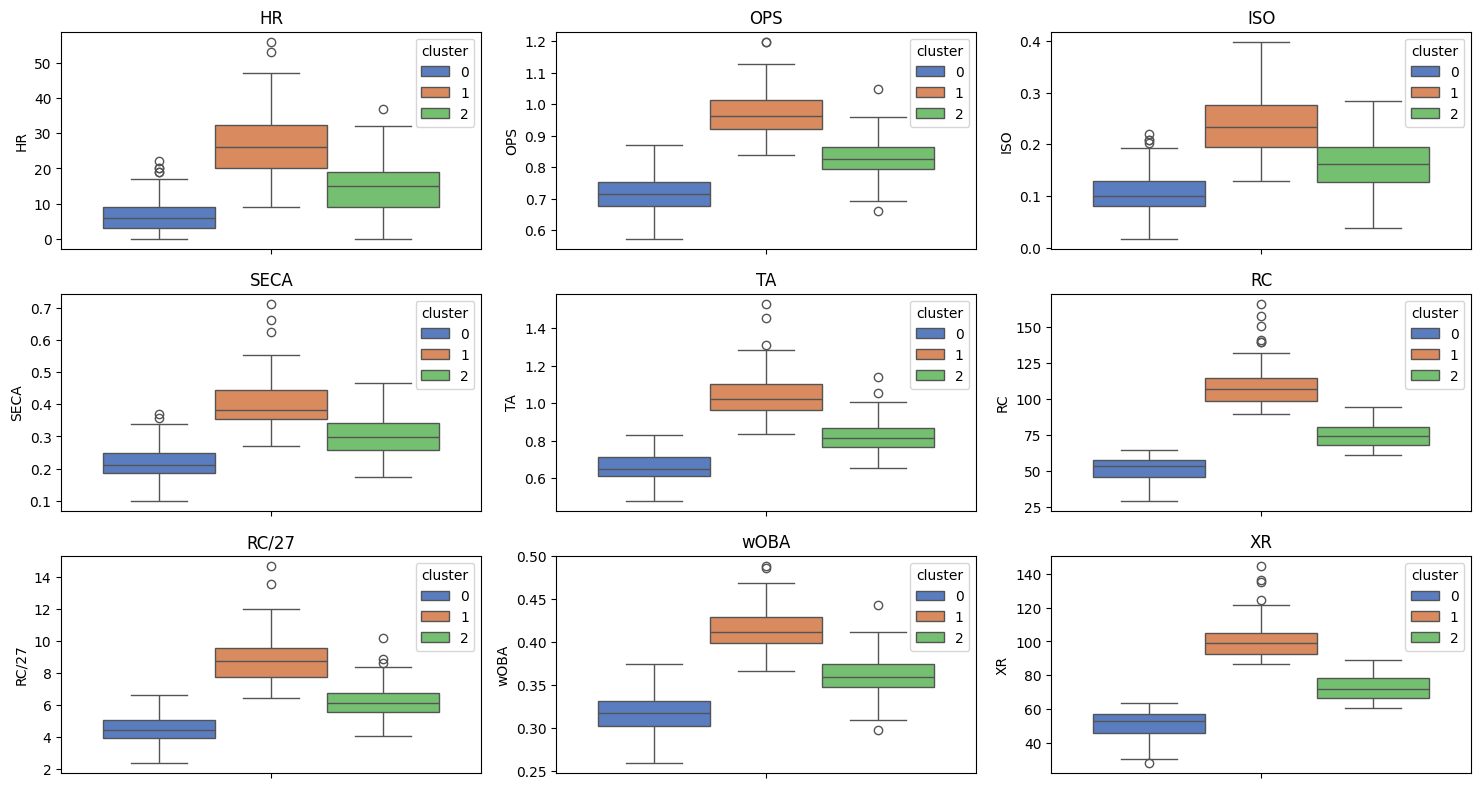

In [49]:
k=3
km = KMeans(n_clusters=k, random_state=42)
cluster = km.fit_predict(X)

# 군집화 결과 분석 
# 데이터프레임 생성
df = pd.DataFrame(X, columns=X.columns)
df['cluster'] = cluster
df.head()

# 군집의 데이터 특징 분석
cols = df.columns[:-1]

plt.figure(figsize=(15,8))
for i, col in enumerate(cols):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=df, y=col, hue='cluster', palette='muted')
    plt.title(col)
plt.tight_layout()

In [50]:
# 데이터프레임에 개별 데이터 실루엣 계수 컬럼 추가
from sklearn.metrics import silhouette_samples

df['silhouette'] = silhouette_samples(X,cluster)

In [51]:
# 잘못 군집화 된 클러스터
df.loc[df['silhouette']<0]

,HR,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,cluster,silhouette
125,15,0.781,0.174935,0.352480,0.780731,61.471058,5.388697,0.341320,62.810,2,-0.017701
275,13,0.826,0.172414,0.310345,0.795775,63.688761,5.950161,0.359984,61.356,2,-0.004014


In [56]:
df['player'] = y

In [58]:
# 클러스터 별 중심 player
df.groupby('cluster')['silhouette'].max()

df.loc[df['silhouette'] == df.groupby('cluster')['silhouette'].transform('max')]


,HR,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,cluster,silhouette,player
1,31,1.017141,0.264392,0.379531,1.063830,115.473840,9.306847,0.431993,105.000,1,0.646572,2000김동주
532,5,0.676000,0.081967,0.152225,0.564024,48.060253,3.794231,0.299786,47.494,0,0.698713,2012김강민
562,15,0.818000,0.140725,0.266525,0.780980,78.435874,5.999344,0.360602,75.406,2,0.670048,2013홍성흔


In [59]:
# 전체 주성분 계산

from sklearn.decomposition import PCA
pca = PCA()
pca_comp = pca.fit_transform(X)
pca_comp

array([[ 3.53426410e+01, -1.28863989e+01, -3.72418257e-01, ...,
         3.64898501e-03,  1.66460760e-02,  2.80543746e-03],
       [ 5.94899426e+01,  2.44446408e+00, -1.36457394e+00, ...,
        -6.44529887e-03,  9.60897311e-03,  2.13329911e-03],
       [ 1.68198065e+01, -2.90627777e+00, -3.02009171e+00, ...,
         1.38692675e-02,  9.18008505e-03,  3.70133622e-03],
       ...,
       [-4.89419151e+01,  1.00074232e+00, -1.32665286e+00, ...,
         6.49106188e-03, -7.13752568e-03, -1.20830722e-03],
       [-2.53947298e+01,  4.19454468e+00,  8.15239601e-01, ...,
         2.46765850e-03, -1.12089536e-04,  3.86159794e-03],
       [-4.06017981e+01,  1.22820450e+01, -5.13924377e-01, ...,
         2.90069877e-02,  2.19673258e-03,  2.23523252e-03]],
      shape=(594, 9))

In [60]:
# 컬럼별 설명된 분산 비율 확인
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.59117862e-01, 3.84460096e-02, 2.15485149e-03, 2.79032091e-04,
       1.55419953e-06, 4.87583561e-07, 1.13582729e-07, 8.43780507e-08,
       5.20169464e-09])

In [61]:
# 누적분산 확인
cumulative_variance = explained_variance.cumsum()
cumulative_variance

array([0.95911786, 0.99756387, 0.99971872, 0.99999776, 0.99999931,
       0.9999998 , 0.99999991, 0.99999999, 1.        ])

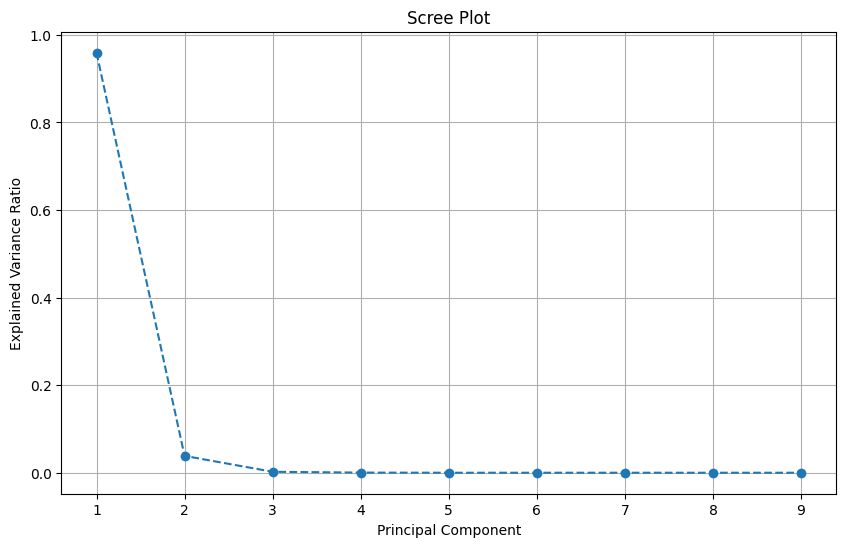

In [62]:
# Plot Scree Chart
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(explained_variance) + 1, 1))
plt.grid()
plt.show()

In [ ]:
# 최적의 주성분 개수 선택 (예: 95% 이상의 분산을 설명하는 최소 주성분 개수)


1

In [63]:
# 2개의 주성분으로 변환하기 
from sklearn.decomposition import PCA

# PCA 수행
pca = PCA(n_components=2)
pca_comp = pca.fit_transform(X)
pca_comp


array([[ 35.34264097, -12.88639894],
       [ 59.48994264,   2.44446408],
       [ 16.81980649,  -2.90627777],
       ...,
       [-48.94191509,   1.00074232],
       [-25.39472984,   4.19454468],
       [-40.60179805,  12.28204501]], shape=(594, 2))

In [64]:
# PCA 설명된 분산 비율 출력
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.95911786, 0.03844601])

In [ ]:
# pc1, pc2로 결과 데이터프레임 생성 

pc1 = 
pc2 = 

,principal component 1,principal component 2
0,2.488648,-1.298711
1,4.863842,-0.328435
2,2.058507,-0.439800
3,5.544865,-0.087107
4,2.134990,0.387255
...,...,...
644,1.024438,1.383975
645,-1.873179,0.821719
646,-0.397191,0.690843
647,-3.940873,-0.424883


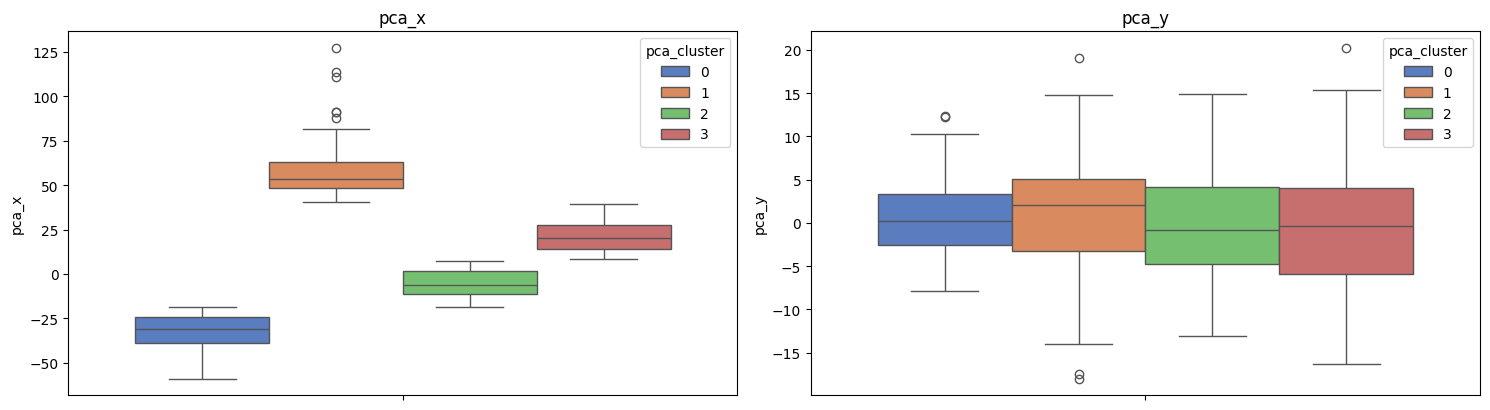

In [98]:
# 주성분으로 군집화
k = 4

km = KMeans(n_clusters=k, random_state=42)
pca_cluster = km.fit_predict(pca_comp)

df_pca = pd.DataFrame(pca_comp, columns=['pca_x', 'pca_y'])
df_pca['pca_cluster']=pca_cluster
df_pca
# 군집의 데이터 특징 분석
cols = df_pca.columns[:-1]

plt.figure(figsize=(15,8))
for i, col in enumerate(cols):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=df_pca, y=col, hue='pca_cluster', palette='muted')
    plt.title(col)
plt.tight_layout()

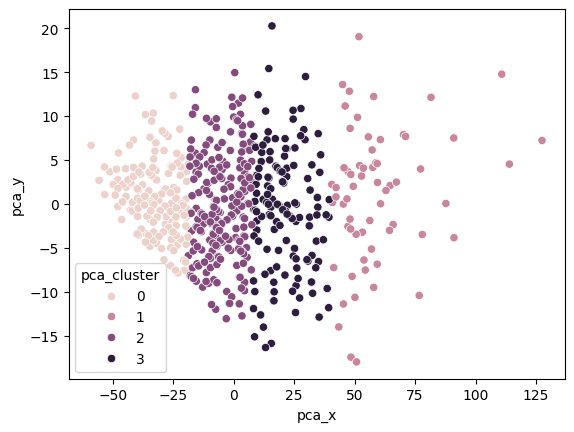

In [99]:
# 군집 결과 시각화
sns.scatterplot(df_pca, x='pca_x', y ='pca_y', hue='pca_cluster' )
plt.show()

In [100]:
# PCA를 전후 군집 결과 비교
df['pca_cluster'] = pca_cluster
df.head()

,HR,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,cluster,silhouette,player,pca_cluster
0,10,0.917819,0.149660,0.297052,0.976667,100.354529,8.286154,0.400138,92.804,1,0.288942,2000박종호,3
1,31,1.017141,0.264392,0.379531,1.063830,115.473840,9.306847,0.431993,105.000,1,0.646572,2000김동주,1
2,15,0.931997,0.195062,0.274074,0.931655,86.204956,8.224501,0.400969,77.820,2,0.538844,2000브리또,3
3,32,1.031229,0.284188,0.423077,1.110092,119.916981,9.811389,0.436688,107.594,1,0.628296,2000송지만,1
4,22,0.932665,0.231504,0.324582,0.923588,82.605677,7.125729,0.394586,80.284,2,0.529275,2000데이비스,3


In [101]:
df[['cluster','pca_cluster']].value_counts()

cluster  pca_cluster
0        0              170
2        2              162
         3              105
1        1               64
0        2               61
1        3               32
Name: count, dtype: int64

In [102]:
df[(df['cluster'] == 1)&(df['pca_cluster'] ==1)]

,HR,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,cluster,silhouette,player,pca_cluster
1,31,1.017141,0.264392,0.379531,1.063830,115.473840,9.306847,0.431993,105.000,1,0.646572,2000김동주,1
3,32,1.031229,0.284188,0.423077,1.110092,119.916981,9.811389,0.436688,107.594,1,0.628296,2000송지만,1
9,25,0.962997,0.253138,0.351464,0.956268,105.422325,8.202890,0.408478,96.722,1,0.596756,2000이영우,1
10,39,1.019587,0.290188,0.457203,1.099415,122.234336,9.566165,0.431357,110.894,1,0.587961,2000우즈,1
12,32,0.977069,0.280164,0.443763,1.021798,110.333916,7.860200,0.409141,107.564,1,0.630796,2000박재홍,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,31,0.954000,0.270789,0.449893,1.028736,109.125893,8.299716,0.405048,103.142,1,0.640432,2012박병호,1
547,11,0.895000,0.128514,0.315261,0.970760,106.843697,8.361681,0.389005,97.776,1,0.467408,2013손아섭,1
553,37,1.039000,0.284444,0.506667,1.199367,128.060288,10.737974,0.439810,116.052,1,0.563081,2013박병호,1
554,28,0.980000,0.235023,0.419355,1.088889,107.868686,9.158662,0.419470,99.128,1,0.632532,2013최정,1


KeyError: 'player'

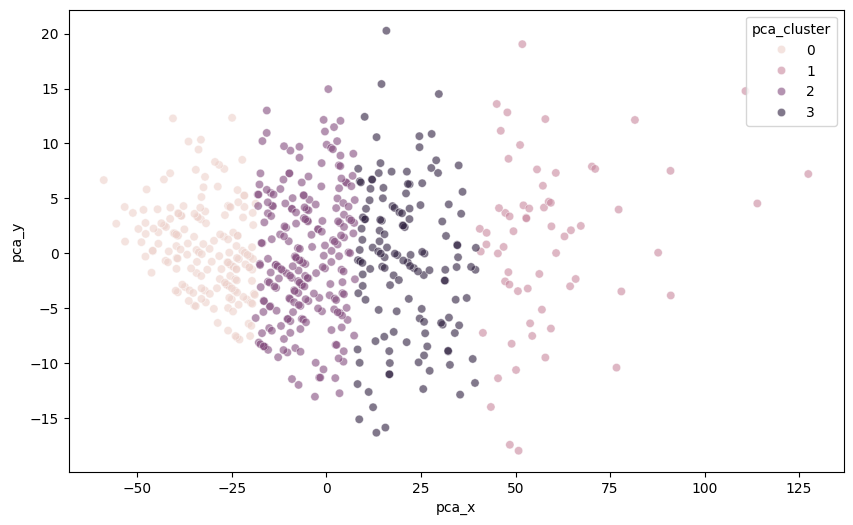

In [106]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='pca_x', y='pca_y', hue='pca_cluster', alpha=0.6)

elite = df_pca[df_pca['pca_cluster'] == 1]
for _, row in elite.iterrows():
    plt.text(row['pca_x'], row['pca_y'], row['player'], fontsize=8, alpha=0.8)

plt.title('PCA Scatter + Elite (pca_cluster=1) Names')
plt.tight_layout()
plt.show()
